In [2]:
#데이터 구성 패키지
import pandas as pd
#행렬 연산 패키지
import numpy as np
#데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
#scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler


#데이터 분할
from sklearn.model_selection import train_test_split
#LightGBM 패키지 불러오기
from lightgbm import LGBMClassifier

#변수 중요도 확인: F1 점수 기준
from lightgbm import plot_importance
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

from subprocess import call
from IPython.display import Image
#로지스틱 회귀
from statsmodels.api import Logit
#분류모델 평가함수
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score,roc_curve,auc
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import SMOTE
import seaborn as sns

import scipy.stats as stats

from scipy.stats import chi2_contingency

%matplotlib inline
matplotlib.rc('font',family = 'Noto Sans CJK JP')
#-기호 false다
matplotlib.rc('axes',unicode_minus = False)

In [3]:
data  = pd.read_csv('/home/piai/test/bigdata/control_para(이결제거).csv')
data

,Unnamed: 0,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,0,NOLSM325131325,Oxidation,dry,1214.307948,26.69,0.203,120,Photo,17.367,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,1,NOLSM326132326,Oxidation,dry,978.110792,30.86,0.217,137,Photo,16.090,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,2,NOLSM327133327,Oxidation,dry,1176.019149,31.07,0.218,116,Photo,19.026,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,3,NOLSM328134328,Oxidation,dry,933.442733,31.04,0.196,143,Photo,18.891,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,4,NOLSM329135329,Oxidation,wet,1140.598752,31.37,0.215,76,Photo,13.788,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1663,NOLSM8483211,Oxidation,wet,1275.182502,45.10,0.214,21,Photo,16.029,...,101.503,868,152,Inspect,78,32,11,28-02-2022,33333,3333
1664,1664,NOLSM8493212,Oxidation,wet,1268.105427,45.07,0.215,22,Photo,17.587,...,101.061,867,152,Inspect,42,32,12,28-02-2022,11133,1113
1665,1665,NOLSM8503213,Oxidation,wet,1279.160563,45.12,0.214,21,Photo,16.445,...,101.506,868,152,Inspect,42,32,13,28-02-2022,11222,1122
1666,1666,NOLSM8513214,Oxidation,wet,1272.804948,45.34,0.213,20,Photo,15.306,...,101.360,868,152,Inspect,24,32,14,28-02-2022,11311,1131


In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data

,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,pressure_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,NOLSM325131325,Oxidation,dry,1214.307948,26.69,0.203,120,Photo,17.367,15.006,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,NOLSM326132326,Oxidation,dry,978.110792,30.86,0.217,137,Photo,16.090,15.059,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,NOLSM327133327,Oxidation,dry,1176.019149,31.07,0.218,116,Photo,19.026,14.930,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,NOLSM328134328,Oxidation,dry,933.442733,31.04,0.196,143,Photo,18.891,14.947,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,NOLSM329135329,Oxidation,wet,1140.598752,31.37,0.215,76,Photo,13.788,14.820,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,NOLSM8483211,Oxidation,wet,1275.182502,45.10,0.214,21,Photo,16.029,15.005,...,101.503,868,152,Inspect,78,32,11,28-02-2022,33333,3333
1664,NOLSM8493212,Oxidation,wet,1268.105427,45.07,0.215,22,Photo,17.587,14.949,...,101.061,867,152,Inspect,42,32,12,28-02-2022,11133,1113
1665,NOLSM8503213,Oxidation,wet,1279.160563,45.12,0.214,21,Photo,16.445,14.978,...,101.506,868,152,Inspect,42,32,13,28-02-2022,11222,1122
1666,NOLSM8513214,Oxidation,wet,1272.804948,45.34,0.213,20,Photo,15.306,15.050,...,101.360,868,152,Inspect,24,32,14,28-02-2022,11311,1131


In [5]:
data['type'] = data['type'].replace({'dry': 1, 'wet': 0})
data.head()

,No_Die,process,type,Temp_OXid,ppm,Pressure,Oxid_time,process 2,N2_HMDS,pressure_HMDS,...,Temp_implantation,Furance_Temp,RTA_Temp,process4.1,Target,Lot_Num,Wafer_Num,Datetime,path,short_path
0,NOLSM325131325,Oxidation,1,1214.307948,26.69,0.203,120,Photo,17.367,15.006,...,103.433,854,154,Inspect,141,13,28,01-03-2022,21111,2111
1,NOLSM326132326,Oxidation,1,978.110792,30.86,0.217,137,Photo,16.090,15.059,...,105.552,895,156,Inspect,55,13,29,01-03-2022,21122,2112
2,NOLSM327133327,Oxidation,1,1176.019149,31.07,0.218,116,Photo,19.026,14.930,...,102.598,898,152,Inspect,96,13,30,01-03-2022,21133,2113
3,NOLSM328134328,Oxidation,1,933.442733,31.04,0.196,143,Photo,18.891,14.947,...,102.963,879,155,Inspect,105,13,31,01-03-2022,21111,2111
4,NOLSM329135329,Oxidation,0,1140.598752,31.37,0.215,76,Photo,13.788,14.820,...,101.419,882,155,Inspect,79,13,32,01-03-2022,21122,2112


In [6]:
def Err(x) :
    if x >= 195 :
        return 1
    else :
        return 0
    
data['Error']=data['Target'].apply(Err)

# data.info()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_Die             1668 non-null   object 
 1   process            1668 non-null   object 
 2   type               1668 non-null   int64  
 3   Temp_OXid          1668 non-null   float64
 4   ppm                1668 non-null   float64
 5   Pressure           1668 non-null   float64
 6   Oxid_time          1668 non-null   int64  
 7   process 2          1668 non-null   object 
 8   N2_HMDS            1668 non-null   float64
 9   pressure_HMDS      1668 non-null   float64
 10  temp_HMDS          1668 non-null   float64
 11  temp_HMDS_bake     1668 non-null   float64
 12  time_HMDS_bake     1668 non-null   float64
 13  spin1              1668 non-null   float64
 14  spin2              1668 non-null   float64
 15  spin3              1668 non-null   float64
 16  photoresist_bake   1668 

# 파이차트

/tmp/ipykernel_20762/1536557351.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


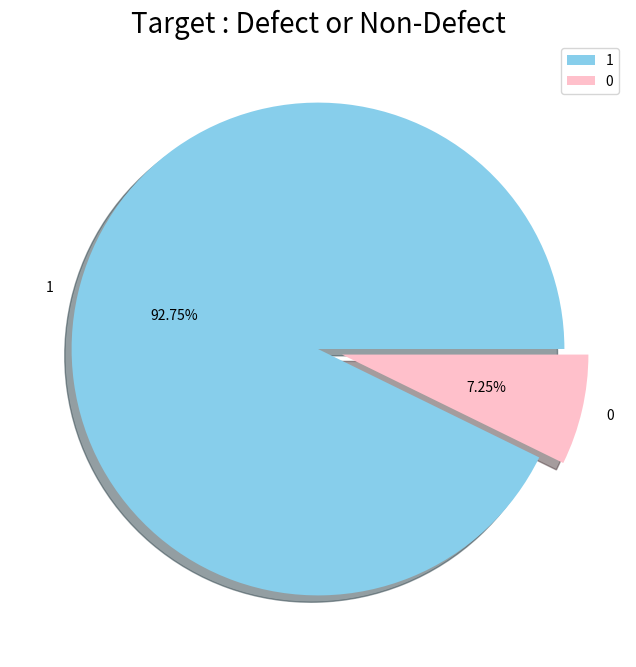

<Axes: >

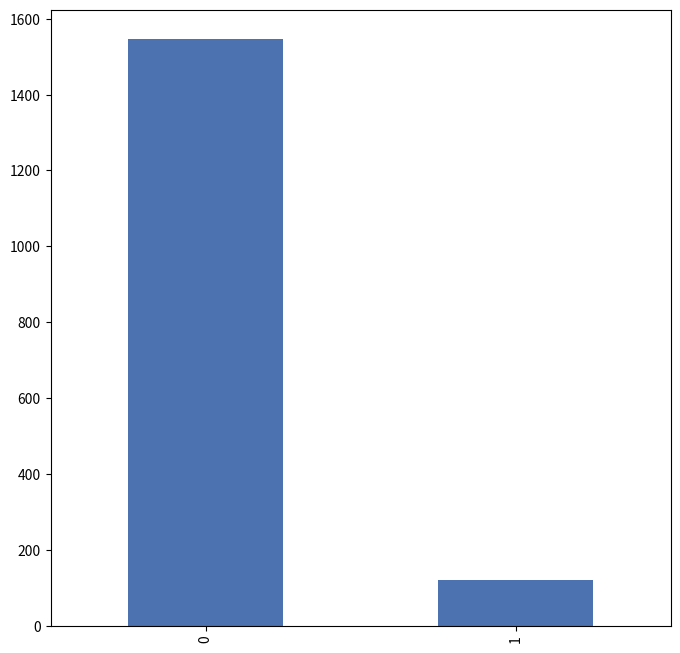

In [8]:
labels = [1, 0]
size = data['Error'].value_counts()
colors = ['skyblue', 'pink']
explode = [0, 0.1]

plt.style.use('seaborn-deep')
plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels=labels, colors=colors, explode=explode, autopct="%.2f%%", shadow=True)
plt.axis('off')
plt.title('Target : Defect or Non-Defect', fontsize = 20)
plt.legend()
plt.show()
data['Error'].value_counts().plot(kind='bar')

In [9]:
data = data.drop(["No_Die", "process","process 2","Process 2-1", "Process 3", "process4", "process4.1", "Target", "Lot_Num", "Wafer_Num", "path", "short_path", "Datetime"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               1668 non-null   int64  
 1   Temp_OXid          1668 non-null   float64
 2   ppm                1668 non-null   float64
 3   Pressure           1668 non-null   float64
 4   Oxid_time          1668 non-null   int64  
 5   N2_HMDS            1668 non-null   float64
 6   pressure_HMDS      1668 non-null   float64
 7   temp_HMDS          1668 non-null   float64
 8   temp_HMDS_bake     1668 non-null   float64
 9   time_HMDS_bake     1668 non-null   float64
 10  spin1              1668 non-null   float64
 11  spin2              1668 non-null   float64
 12  spin3              1668 non-null   float64
 13  photoresist_bake   1668 non-null   float64
 14  temp_softbake      1668 non-null   float64
 15  time_softbake      1668 non-null   float64
 16  Wavelength         1668 

In [56]:
from imblearn.over_sampling import RandomOverSampler
# Train-Test Split (70:30)
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data["Error"], test_size=0.3)

# Random Oversampling
ros = RandomOverSampler(sampling_strategy='minority')
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_resampled, y_resampled, test_size=0.3)

# 기본 모델로 Gradient Boosting 모델

In [11]:
# 그래디언트 부스팅 모델 생성 : GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier()
gb_uncust.fit(x_train, y_train)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score(x_train, y_train)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score(x_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.957


In [12]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# learning rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate)
    gb.fit(x_train, y_train)
    train_accuracy.append(gb.score(x_train, y_train))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_lr = pd.DataFrame()
data_accuracy_lr["LearningRate"] = para_lr
data_accuracy_lr["TrainAccuracy"] = train_accuracy
data_accuracy_lr["TestAccuracy"] = test_accuracy
data_accuracy_lr["Diff"] = data_accuracy_lr["TrainAccuracy"] - data_accuracy_lr["TestAccuracy"]

# learning rate별 정확도
data_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy,Diff
0,0.1,0.991,0.955,0.036
1,0.2,1.000,0.963,0.037
2,0.3,1.000,0.964,0.036
3,0.4,1.000,0.963,0.037
4,0.5,1.000,0.951,0.049
5,0.6,1.000,0.949,0.051
6,0.7,1.000,0.945,0.055
7,0.8,1.000,0.951,0.049
8,0.9,1.000,0.952,0.048


learning rate 0.1 선택 / 0.2 킵

In [13]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]
test_accuracy = []

# n_estimators : 트리수 변경 
para_n_tree = [n_tree * 10 for n_tree in range(1, 30)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingClassifier(n_estimators= v_n_estimators, learning_rate = 0.1)
    gb.fit(x_train, y_train)
    train_accuracy.append(gb.score(x_train, y_train))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_n = pd.DataFrame()
data_accuracy_n["n_estimators"] = para_n_tree
data_accuracy_n["TrainAccuracy"] = train_accuracy
data_accuracy_n["TestAccuracy"] = test_accuracy
data_accuracy_n["Diff"] = data_accuracy_n["TrainAccuracy"] - data_accuracy_n["TestAccuracy"]

# 모델 정확도 확인
data_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,Diff
0,10,0.937,0.943,-0.006
1,20,0.945,0.945,0.000
2,30,0.948,0.943,0.005
3,40,0.955,0.946,0.009
4,50,0.964,0.948,0.016
5,60,0.979,0.949,0.030
6,70,0.984,0.948,0.036
7,80,0.986,0.952,0.034
8,90,0.990,0.955,0.035
9,100,0.991,0.955,0.036


디폴트 100으로 결정 / 아니면 아래쪽..?

In [14]:
# 모델 파라미터 조정 - max_depth 
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# max_depth 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 100, learning_rate = 0.1)
    gb.fit(x_train, y_train)
    train_accuracy.append(gb.score(x_train, y_train))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_depth = pd.DataFrame()
data_accuracy_depth["Depth"] = para_depth
data_accuracy_depth["TrainAccuracy"] = train_accuracy
data_accuracy_depth["TestAccuracy"] = test_accuracy
data_accuracy_depth["Diff"] = data_accuracy_depth["TrainAccuracy"] - data_accuracy_depth["TestAccuracy"]

# 모델 정확도 확인
data_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,Diff
0,1,0.933,0.942,-0.009
1,2,0.961,0.949,0.012
2,3,0.991,0.957,0.034
3,4,1.000,0.961,0.039
4,5,1.000,0.966,0.034
5,6,1.000,0.966,0.034
6,7,1.000,0.964,0.036
7,8,1.000,0.963,0.037
8,9,1.000,0.961,0.039
9,10,1.000,0.952,0.048


max_depth는 6? 8?

In [15]:
# 최종 모델 선정
gb_final = GradientBoostingClassifier(max_depth = 6,n_estimators = 100, learning_rate=0.1)
gb_final.fit(x_train, y_train)
y_pred = gb_final.predict(x_test)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(x_train, y_train)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(x_test, y_test)))

# confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_pred)))

# 목표변수의 빈도 불균형 : f1 score 모델 평가
print(classification_report(y_test, y_pred, digits = 3))

Accuracy on training set: 1.000
Accuracy on test set: 0.966
Confusion Matrix : 
[[620   4]
 [ 19  25]]
              precision    recall  f1-score   support

           0      0.970     0.994     0.982       624
           1      0.862     0.568     0.685        44

    accuracy                          0.966       668
   macro avg      0.916     0.781     0.833       668
weighted avg      0.963     0.966     0.962       668



In [16]:
# xgboost 패키지 불러오기 
from xgboost import XGBClassifier

# 변수 중요도 확인: F1 점수 기준
from xgboost import plot_importance

from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
# 분류모델 통합 평가: 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 등
def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [27]:
from imblearn.over_sampling import RandomOverSampler
# Train-Test Split (70:30)
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data["Error"], test_size=0.3)

# Random Oversampling
ros = RandomOverSampler(sampling_strategy='minority')
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)
x_train_ros, x_test_ros, y_train_ros, y_test_ros = train_test_split(x_resampled, y_resampled, test_size=0.3)

# XGBoost

In [28]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier()

xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [29]:
# 모델 적합
xgboost_uncust.fit(x_train, y_train)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(x_train)
# 모델 평가
eval_class_model(y_train, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(x_test)
# 모델 평가
eval_class_model(y_test, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[1091    0]
 [   0   76]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[455   1]
 [ 21  24]] 

정확도: 0.9561
정밀도: 0.9600
재현율: 0.5333
F1    : 0.6857
AUC   : 0.7656


In [30]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5)
# 모델 적합
xgboost_user.fit(x_train, y_train)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(x_train)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(y_train, xgb_pred_train)
print('\n',classification_report(y_train, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(x_test)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(y_test, xgb_pred_test)
print('\n',classification_report(y_test, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[1091    0]
 [   2   74]] 

정확도: 0.9983
정밀도: 1.0000
재현율: 0.9737
F1    : 0.9867
AUC   : 0.9868

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1091
           1       1.00      0.97      0.99        76

    accuracy                           1.00      1167
   macro avg       1.00      0.99      0.99      1167
weighted avg       1.00      1.00      1.00      1167


 사용자 모델 평가 : Test 

오차행렬:
 [[455   1]
 [ 25  20]] 

정확도: 0.9481
정밀도: 0.9524
재현율: 0.4444
F1    : 0.6061
AUC   : 0.7211

               precision    recall  f1-score   support

           0       0.95      1.00      0.97       456
           1       0.95      0.44      0.61        45

    accuracy                           0.95       501
   macro avg       0.95      0.72      0.79       501
weighted avg       0.95      0.95      0.94       501



# 오버 샘플링 GB 

In [57]:
# 그래디언트 부스팅 모델 생성 : GradientBoostingClassifier
gb_uncust = GradientBoostingClassifier()
gb_uncust.fit(x_train_ros, y_train_ros)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_uncust.score(x_train_ros, y_train_ros)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_uncust.score(x_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.944


In [58]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# learning rate 학습률 변경
para_lr = [lr * 0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr :
    gb = GradientBoostingClassifier(learning_rate=v_learning_rate)
    gb.fit(x_train_ros, y_train_ros)
    train_accuracy.append(gb.score(x_train_ros, y_train_ros))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_lr = pd.DataFrame()
data_accuracy_lr["LearningRate"] = para_lr
data_accuracy_lr["TrainAccuracy"] = train_accuracy
data_accuracy_lr["TestAccuracy"] = test_accuracy
data_accuracy_lr["Diff"] = data_accuracy_lr["TrainAccuracy"] - data_accuracy_lr["TestAccuracy"]

# learning rate별 정확도
data_accuracy_lr.round(3)

,LearningRate,TrainAccuracy,TestAccuracy,Diff
0,0.1,0.991,0.948,0.043
1,0.2,0.999,0.948,0.051
2,0.3,1.000,0.960,0.040
3,0.4,1.000,0.958,0.042
4,0.5,1.000,0.964,0.036
5,0.6,1.000,0.962,0.038
6,0.7,1.000,0.958,0.042
7,0.8,1.000,0.962,0.038
8,0.9,1.000,0.956,0.044


In [59]:
# train 및 test 정확도 결과 저장용
train_accuracy =[]
test_accuracy = []

# n_estimators : 트리수 변경 
para_n_tree = [n_tree * 10 for n_tree in range(1, 30)]

for v_n_estimators in para_n_tree :
    gb = GradientBoostingClassifier(n_estimators= v_n_estimators, learning_rate = 0.1)
    gb.fit(x_train_ros, y_train_ros)
    train_accuracy.append(gb.score(x_train_ros, y_train_ros))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_n = pd.DataFrame()
data_accuracy_n["n_estimators"] = para_n_tree
data_accuracy_n["TrainAccuracy"] = train_accuracy
data_accuracy_n["TestAccuracy"] = test_accuracy
data_accuracy_n["Diff"] = data_accuracy_n["TrainAccuracy"] - data_accuracy_n["TestAccuracy"]

# 모델 정확도 확인
data_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,Diff
0,10,0.909,0.880,0.029
1,20,0.936,0.888,0.048
2,30,0.945,0.904,0.041
3,40,0.957,0.910,0.047
4,50,0.976,0.916,0.059
5,60,0.981,0.926,0.055
6,70,0.983,0.930,0.053
7,80,0.988,0.938,0.050
8,90,0.991,0.936,0.055
9,100,0.991,0.946,0.045


In [60]:
# 모델 파라미터 조정 - max_depth 
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []

# max_depth 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth :
    gb = GradientBoostingClassifier(max_depth = v_max_depth, n_estimators = 100, learning_rate = 0.1)
    gb.fit(x_train_ros, y_train_ros)
    train_accuracy.append(gb.score(x_train_ros, y_train_ros))
    test_accuracy.append(gb.score(x_test, y_test))
    
# 데이터 테이블로 저장
data_accuracy_depth = pd.DataFrame()
data_accuracy_depth["Depth"] = para_depth
data_accuracy_depth["TrainAccuracy"] = train_accuracy
data_accuracy_depth["TestAccuracy"] = test_accuracy
data_accuracy_depth["Diff"] = data_accuracy_depth["TrainAccuracy"] - data_accuracy_depth["TestAccuracy"]

# 모델 정확도 확인
data_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,Diff
0,1,0.832,0.836,-0.004
1,2,0.968,0.902,0.066
2,3,0.991,0.944,0.047
3,4,0.999,0.962,0.037
4,5,1.000,0.964,0.036
5,6,1.000,0.956,0.044
6,7,1.000,0.964,0.036
7,8,1.000,0.942,0.058
8,9,1.000,0.930,0.070
9,10,1.000,0.926,0.074


In [61]:
# 최종 모델 선정 1
gb_final = GradientBoostingClassifier(max_depth = 7, n_estimators = 100, learning_rate=0.1)
gb_final.fit(x_train_ros, y_train_ros)
y_pred = gb_final.predict(x_test)

# train 모델 정확도
print("Accuracy on training set: {:.3f}".format(gb_final.score(x_train_ros, y_train_ros)))

# test 모델 정확도
print("Accuracy on test set: {:.3f}".format(gb_final.score(x_test, y_test)))

# confusion matrix
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_pred)))

# 목표변수의 빈도 불균형 : f1 score 모델 평가
print(classification_report(y_test, y_pred, digits = 3))

Accuracy on training set: 1.000
Accuracy on test set: 0.964
Confusion Matrix : 
[[458   8]
 [ 10  25]]
              precision    recall  f1-score   support

           0      0.979     0.983     0.981       466
           1      0.758     0.714     0.735        35

    accuracy                          0.964       501
   macro avg      0.868     0.849     0.858       501
weighted avg      0.963     0.964     0.964       501



In [63]:
# 원하는 threshld 값으로 설정
threshold = 0.5

# 예측 확률 가져오기
y_pred_prob = gb_final.predict_proba(x_test)[:, 1]  # 양성 클래스에 대한 예측 확률 추출

# threshold 조정하여 예측 값을 양성 또는 음성으로 변경
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# 변경된 예측 값에 대한 평가
print("Adjusted Model Performance:")
print("Accuracy: {:.3f}".format(accuracy_score(y_test, y_pred_adjusted)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("Classification Report:\n", classification_report(y_test, y_pred_adjusted, digits=3))



Adjusted Model Performance:
Accuracy: 0.964
Confusion Matrix:
 [[458   8]
 [ 10  25]]
Classification Report:
               precision    recall  f1-score   support

           0      0.979     0.983     0.981       466
           1      0.758     0.714     0.735        35

    accuracy                          0.964       501
   macro avg      0.868     0.849     0.858       501
weighted avg      0.963     0.964     0.964       501



# 오버샘플 XGBoost

In [37]:
# 기본 모델 지정 및 기본 옵션 확인
xgboost_uncust = XGBClassifier()

xgboost_uncust

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [38]:
# 모델 적합
xgboost_uncust.fit(x_train_ros, y_train_ros)

print('\n 모델 생성 및 평가 : Train \n')
# 예측 및 모델 평가:train  
xgb_pred_train = xgboost_uncust.predict(x_train_ros)
# 모델 평가
eval_class_model(y_train_ros, xgb_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
# 예측 및 모델 평가:test 
xgb_pred_test = xgboost_uncust.predict(x_test)
# 모델 평가
eval_class_model(y_test, xgb_pred_test)


 모델 생성 및 평가 : Train 

오차행렬:
 [[743   0]
 [  0 784]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[452   4]
 [ 16  29]] 

정확도: 0.9601
정밀도: 0.8788
재현율: 0.6444
F1    : 0.7436
AUC   : 0.8178


In [39]:
# 사용자 모델 생성
xgboost_user= XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 5)
# 모델 적합
xgboost_user.fit(x_train_ros, y_train_ros)

# 예측 및 모델 평가:Train  
xgb_pred_train = xgboost_user.predict(x_train_ros)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(y_train_ros, xgb_pred_train)
print('\n',classification_report(y_train_ros, xgb_pred_train))


# 예측 및 모델 평가:Test  
xgb_pred_test = xgboost_user.predict(x_test)

print('\n 사용자 모델 평가 : Test \n')
eval_class_model(y_test, xgb_pred_test)
print('\n',classification_report(y_test, xgb_pred_test))


 사용자 모델 평가 : Train 

오차행렬:
 [[743   0]
 [  0 784]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       743
           1       1.00      1.00      1.00       784

    accuracy                           1.00      1527
   macro avg       1.00      1.00      1.00      1527
weighted avg       1.00      1.00      1.00      1527


 사용자 모델 평가 : Test 

오차행렬:
 [[449   7]
 [ 14  31]] 

정확도: 0.9581
정밀도: 0.8158
재현율: 0.6889
F1    : 0.7470
AUC   : 0.8368

               precision    recall  f1-score   support

           0       0.97      0.98      0.98       456
           1       0.82      0.69      0.75        45

    accuracy                           0.96       501
   macro avg       0.89      0.84      0.86       501
weighted avg       0.96      0.96      0.96       501



# light bgm

In [50]:
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

def eval_class_model(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)

    
    print('오차행렬:\n', confusion, '\n')
    print('정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1    : {:.4f}'.format(F1))
    print('AUC   : {:.4f}'.format(AUC))

In [51]:
lgbm_uncust = LGBMClassifier()
lgbm_uncust.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [52]:
lgbm_uncust.fit(x_train,y_train)

print('\n 모델 생성 및 평가: Train \n')
lgbm_pred_train = lgbm_uncust.predict(x_train)
eval_class_model(y_train,lgbm_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
lgbm_pred_test = lgbm_uncust.predict(x_test)
eval_class_model(y_test, lgbm_pred_test)

[LightGBM] [Info] Number of positive: 76, number of negative: 1091
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000900 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4119
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.065124 -> initscore=-2.664117
[LightGBM] [Info] Start training from score -2.664117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

 모델 생성 및 평가: Train 

오차행렬:
 [[1091    0]
 [   0   76]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[455   1]
 [ 20  25]] 

정확도: 0.9581
정밀도: 0.9615
재현율: 0.5556
F1    : 0.7042
AUC   : 0.7767


In [43]:
lgbm_user = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)
lgbm_user.fit(x_train, y_train)

lgbm_pred_train = lgbm_user.predict(x_train)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(y_train, lgbm_pred_train)
print('\n', classification_report(y_train, lgbm_pred_train))

lgbm_pred_test = lgbm_user.predict(x_test)
print('\n 사용자 모델 평가 : Test \n')
eval_class_model(y_test, lgbm_pred_test)
print('\n', classification_report(y_test, lgbm_pred_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 76, number of negative: 1091
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000528 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4119
[LightGBM] [Info] Number of data points in the train set: 1167, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.065124 -> initscore=-2.664117
[LightGBM] [Info] Start training from score -2.664117
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

# 오버 샘플링 lightgbm

In [53]:
lgbm_uncust.fit(x_train_ros,y_train_ros)

print('\n 모델 생성 및 평가: Train \n')
lgbm_pred_train = lgbm_uncust.predict(x_train_ros)
eval_class_model(y_train_ros,lgbm_pred_train)

print('\n 모델 생성 및 평가 : Test \n')
lgbm_pred_test = lgbm_uncust.predict(x_test)
eval_class_model(y_test, lgbm_pred_test)

[LightGBM] [Info] Number of positive: 784, number of negative: 743
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4009
[LightGBM] [Info] Number of data points in the train set: 1527, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513425 -> initscore=0.053713
[LightGBM] [Info] Start training from score 0.053713

 모델 생성 및 평가: Train 

오차행렬:
 [[743   0]
 [  0 784]] 

정확도: 1.0000
정밀도: 1.0000
재현율: 1.0000
F1    : 1.0000
AUC   : 1.0000

 모델 생성 및 평가 : Test 

오차행렬:
 [[453   3]
 [ 18  27]] 

정확도: 0.9581
정밀도: 0.9000
재현율: 0.6000
F1    : 0.7200
AUC   : 0.7967


In [54]:
lgbm_user = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=6)
lgbm_user.fit(x_train_ros, y_train_ros)

lgbm_pred_train = lgbm_user.predict(x_train_ros)

print('\n 사용자 모델 평가 : Train \n')
eval_class_model(y_train_ros, lgbm_pred_train)
print('\n', classification_report(y_train_ros, lgbm_pred_train))

lgbm_pred_test = lgbm_user.predict(x_test)
print('\n 사용자 모델 평가 : Test \n')
eval_class_model(y_test, lgbm_pred_test)
print('\n', classification_report(y_test, lgbm_pred_test))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 784, number of negative: 743
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4009
[LightGBM] [Info] Number of data points in the train set: 1527, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.513425 -> initscore=0.053713
[LightGBM] [Info] Start training from score 0.053713
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

# 오버 샘플링 lgbm에 test값 넣기

In [55]:
new_x_data = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열이 x 변수입니다
new_y_data = data["Error"]    # 마지막 열이 y 변수입니다


new_predictions = lgbm_user.predict(new_x_data)


print("Predictions for new data: ", new_predictions)


print("Confusion Matrix for new data: \n{}".format(confusion_matrix(new_y_data, new_predictions)))
print("Classification Report for new data:\n", classification_report(new_y_data, new_predictions, digits=3))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Predictions for new data:  [0 0 0 ... 0 0 0]
Confusion Matrix for new data: 
[[1538    9]
 [  16  105]]
Classification Report for new data:
               precision    recall  f1-score   support

           0      0.990     0.994     0.992      1547
           1      0.921     0.868     0.894       121

    accuracy                          0.985      1668
   macro avg      0.955     0.931     0.943      1668
weighted avg      0.985     0.985     0.985      1668



# 오버 샘플링 xgboost에 test값 넣기

In [47]:
new_x_data = data.iloc[:, :-1]  # 마지막 열을 제외한 모든 열이 x 변수입니다
new_y_data = data["Error"]    # 마지막 열이 y 변수입니다


new_predictions = xgboost_user.predict(new_x_data)


print("Predictions for new data: ", new_predictions)


print("Confusion Matrix for new data: \n{}".format(confusion_matrix(new_y_data, new_predictions)))
print("Classification Report for new data:\n", classification_report(new_y_data, new_predictions, digits=3))

Predictions for new data:  [0 0 0 ... 0 0 0]
Confusion Matrix for new data: 
[[1533   14]
 [  14  107]]
Classification Report for new data:
               precision    recall  f1-score   support

           0      0.991     0.991     0.991      1547
           1      0.884     0.884     0.884       121

    accuracy                          0.983      1668
   macro avg      0.938     0.938     0.938      1668
weighted avg      0.983     0.983     0.983      1668



['type', 'Temp_OXid', 'ppm', 'Pressure', 'Oxid_time', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake', 'temp_softbake', 'time_softbake', 'Wavelength', 'Energy_Exposure', 'Temp_Etching', 'Source_Power', 'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp']
[ 15 137  84 108  45 130  89  61 125  22 102  98  91 132 119  44  24  84
 118 113 109  96  72  25]


24

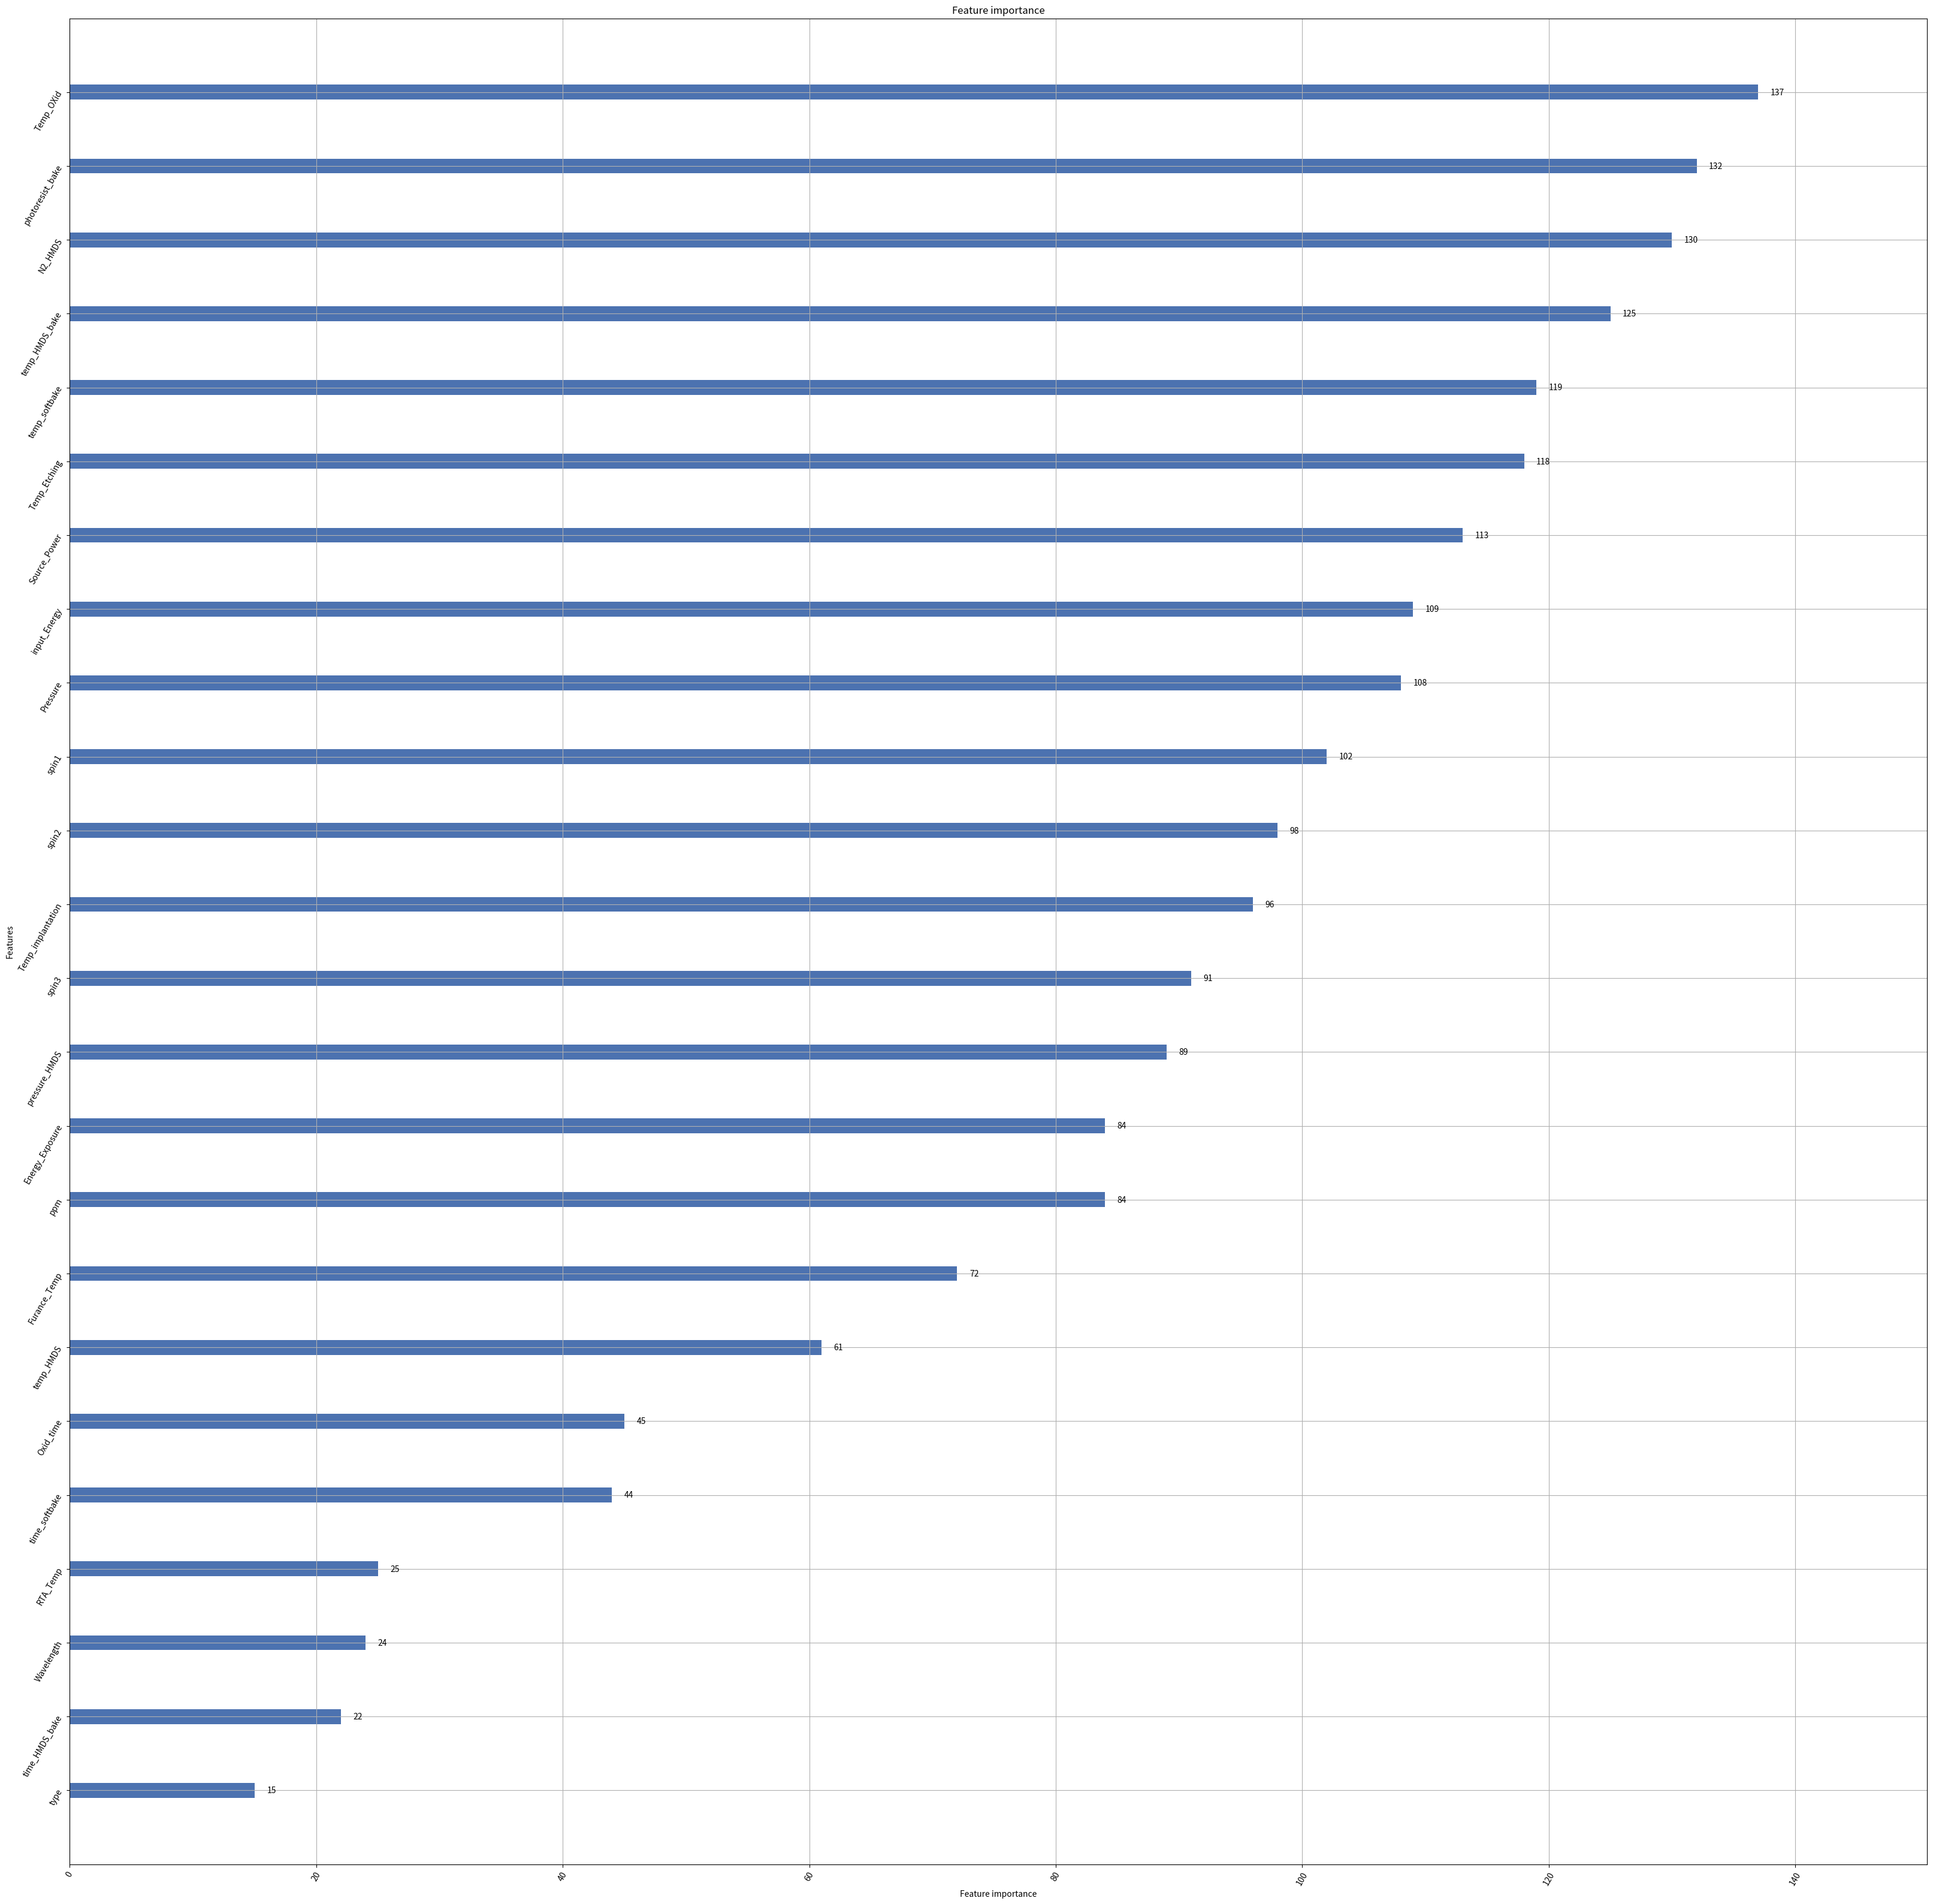

In [48]:
from lightgbm import plot_importance
print(lgbm_user.feature_name_)
print(lgbm_user.feature_importances_)
fig, ax = plt.subplots(figsize = (40,40))
plot_importance(lgbm_user, ax=ax)
plt.xticks(rotation=60)
plt.yticks(rotation=60)
plt.rcParams['font.size'] = 40
len(lgbm_user.feature_name_)



In [49]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

print(lgbm_user.feature_name_)
print(lgbm_user.feature_importances_)

# 그래프의 폰트 크기 설정
plt.rcParams['font.size'] = 40

# 특성의 이름과 중요도 추출
feature_importances = lgbm_user.feature_importances_
feature_names = lgbm_user.feature_name_

# 중요도가 작은 순서대로 상위 12개 특성 선택
top_features_indices = feature_importances.argsort()[:6][]
top_feature_names = [feature_names[idx] for idx in top_features_indices]
top_feature_importances = [feature_importances[idx] for idx in top_features_indices]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(40, 40))

# 상위 12개 특성 그래프
ax.barh(range(len(top_feature_names)), top_feature_importances, align='center', color='blue')
ax.set_yticks(range(len(top_feature_names)))
ax.set_yticklabels(top_feature_names)

plt.show()


SyntaxError: invalid syntax (819581142.py, line 15)

['type', 'Temp_OXid', 'ppm', 'Pressure', 'Oxid_time', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake', 'temp_softbake', 'time_softbake', 'Wavelength', 'Energy_Exposure', 'Temp_Etching', 'Source_Power', 'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp']
[ 17 122 145 117  53 135 124  58 105  31  46 101  85 167 152  57  14  98
 155  84 143 111  95  24]


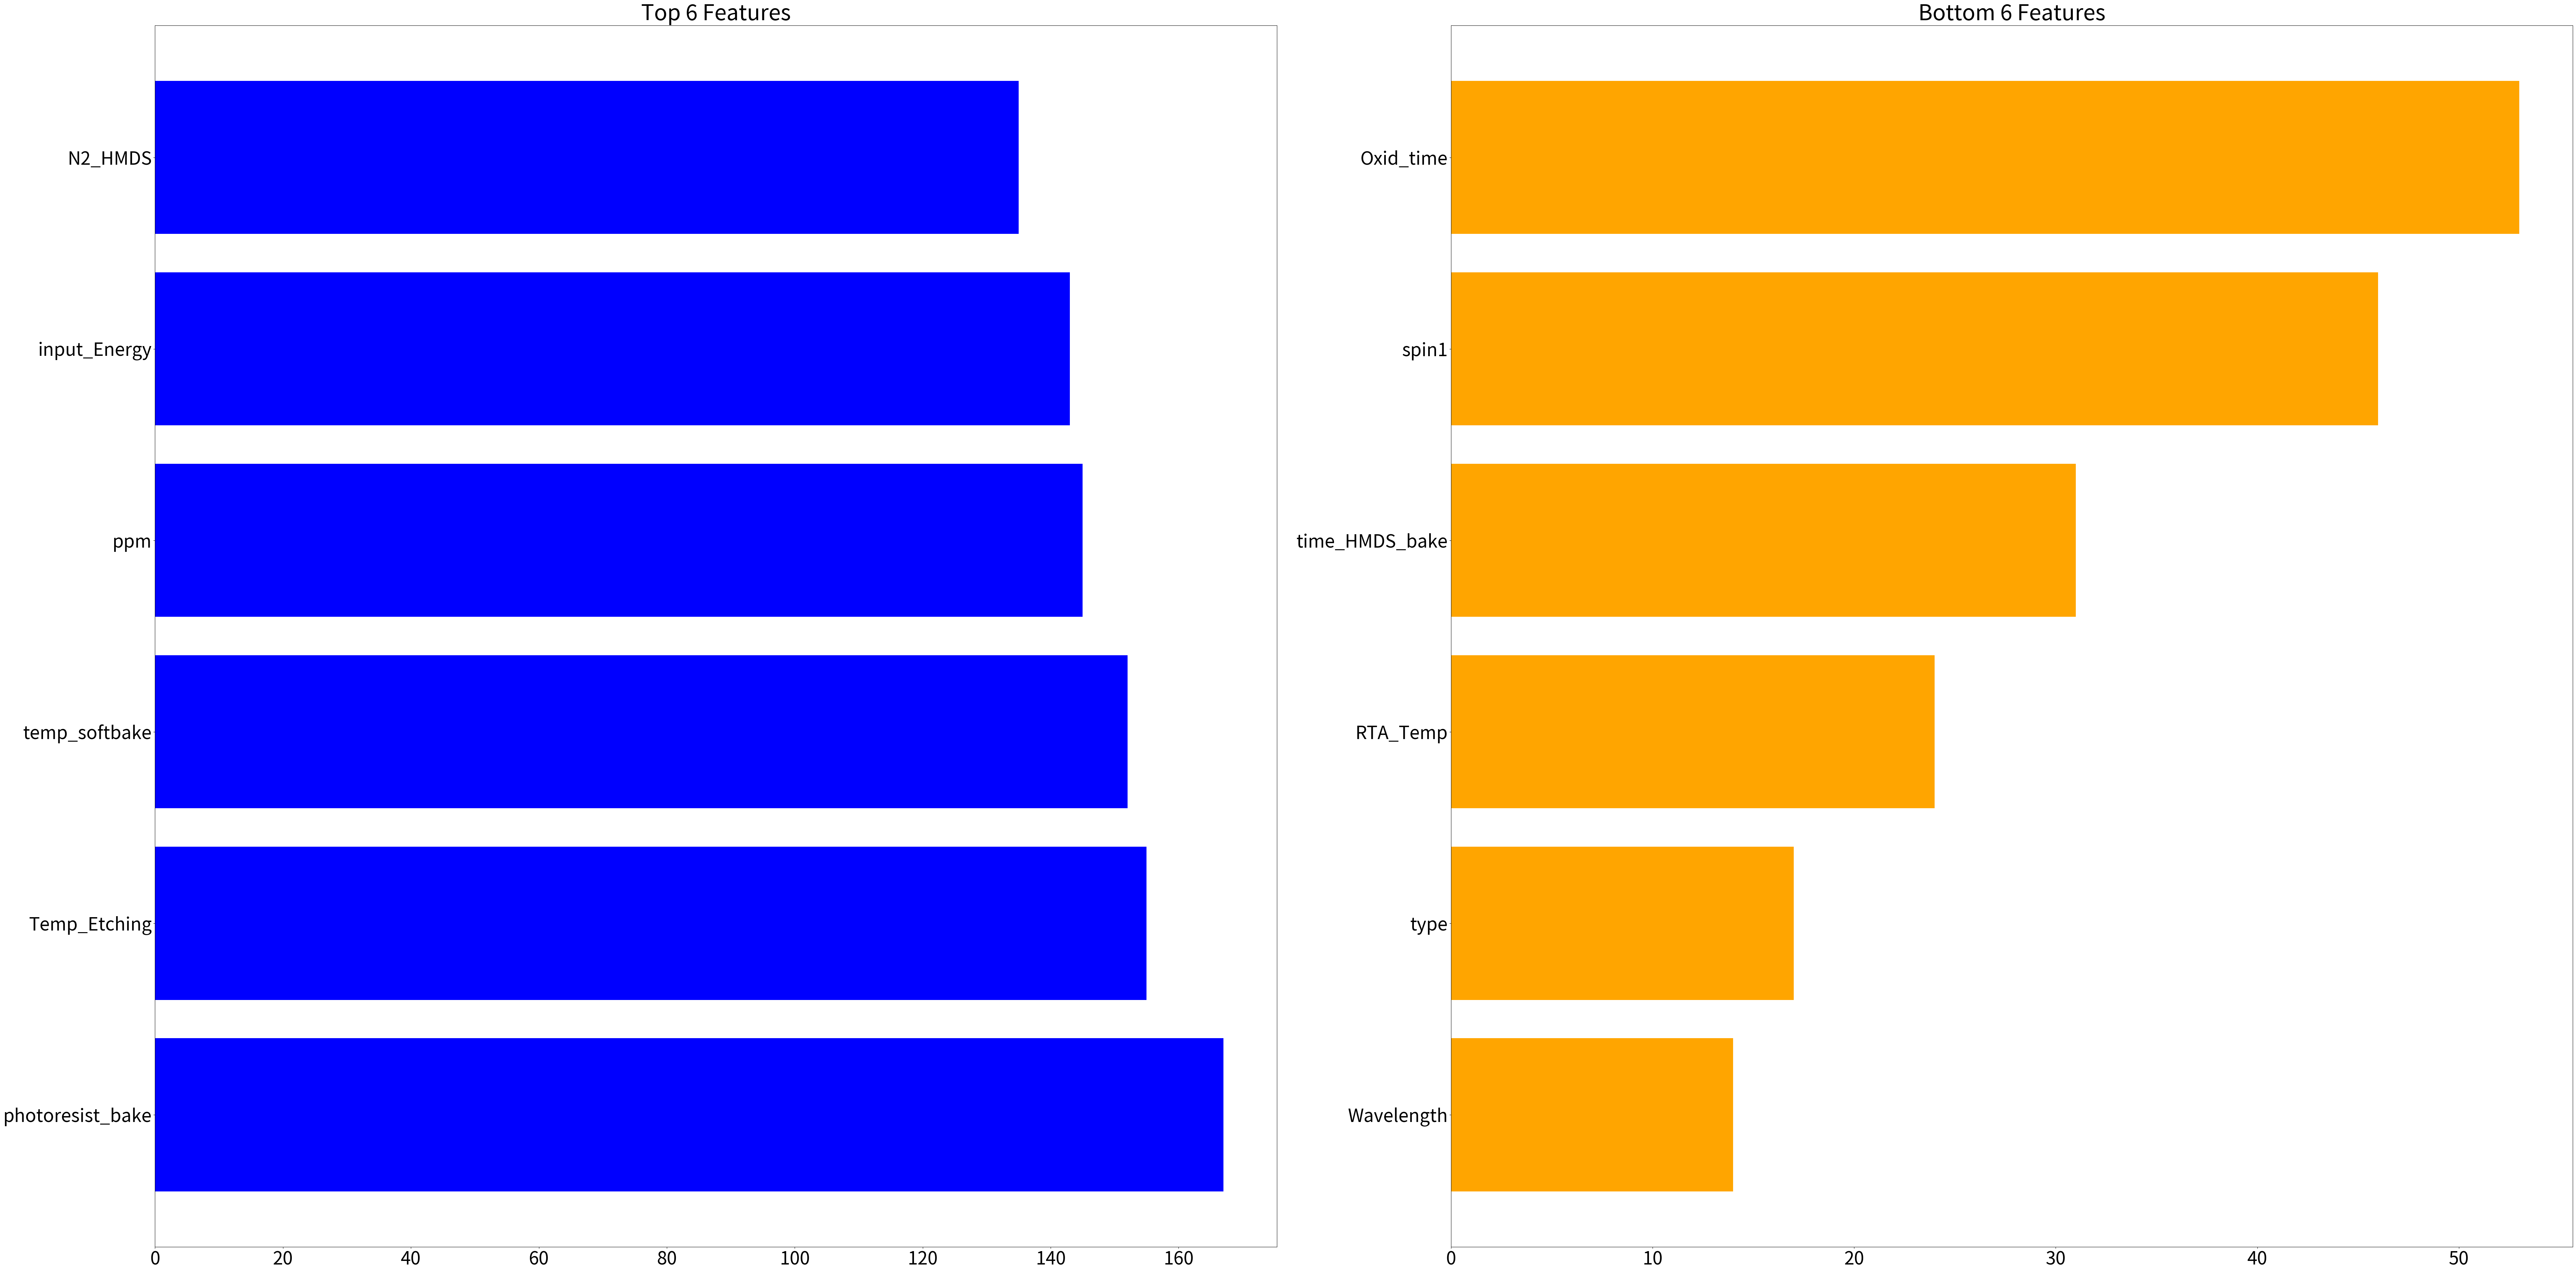

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

print(lgbm_user.feature_name_)
print(lgbm_user.feature_importances_)

# 그래프의 폰트 크기 설정
plt.rcParams['font.size'] = 40

# 특성의 이름과 중요도 추출
feature_importances = lgbm_user.feature_importances_
feature_names = lgbm_user.feature_name_

# 중요도가 큰 순서대로 상위 6개 특성 선택
top_features_indices = feature_importances.argsort()[-6:][::-1]
top_feature_names = [feature_names[idx] for idx in top_features_indices]
top_feature_importances = [feature_importances[idx] for idx in top_features_indices]

# 중요도가 작은 순서대로 하위 6개 특성 선택
bottom_features_indices = feature_importances.argsort()[:6]
bottom_feature_names = [feature_names[idx] for idx in bottom_features_indices]
bottom_feature_importances = [feature_importances[idx] for idx in bottom_features_indices]

# 그래프 그리기
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(80, 40))

# 상위 6개 특성 그래프
axes[0].barh(range(len(top_feature_names)), top_feature_importances, align='center', color='blue')
axes[0].set_yticks(range(len(top_feature_names)))
axes[0].set_yticklabels(top_feature_names)
axes[0].set_title('Top 6 Features')

# 하위 6개 특성 그래프
axes[1].barh(range(len(bottom_feature_names)), bottom_feature_importances, align='center', color='orange')
axes[1].set_yticks(range(len(bottom_feature_names)))
axes[1].set_yticklabels(bottom_feature_names)
axes[1].set_title('Bottom 6 Features')

plt.tight_layout()
plt.show()


['type', 'Temp_OXid', 'ppm', 'Pressure', 'Oxid_time', 'N2_HMDS', 'pressure_HMDS', 'temp_HMDS', 'temp_HMDS_bake', 'time_HMDS_bake', 'spin1', 'spin2', 'spin3', 'photoresist_bake', 'temp_softbake', 'time_softbake', 'Wavelength', 'Energy_Exposure', 'Temp_Etching', 'Source_Power', 'input_Energy', 'Temp_implantation', 'Furance_Temp', 'RTA_Temp']
[ 17 122 145 117  53 135 124  58 105  31  46 101  85 167 152  57  14  98
 155  84 143 111  95  24]


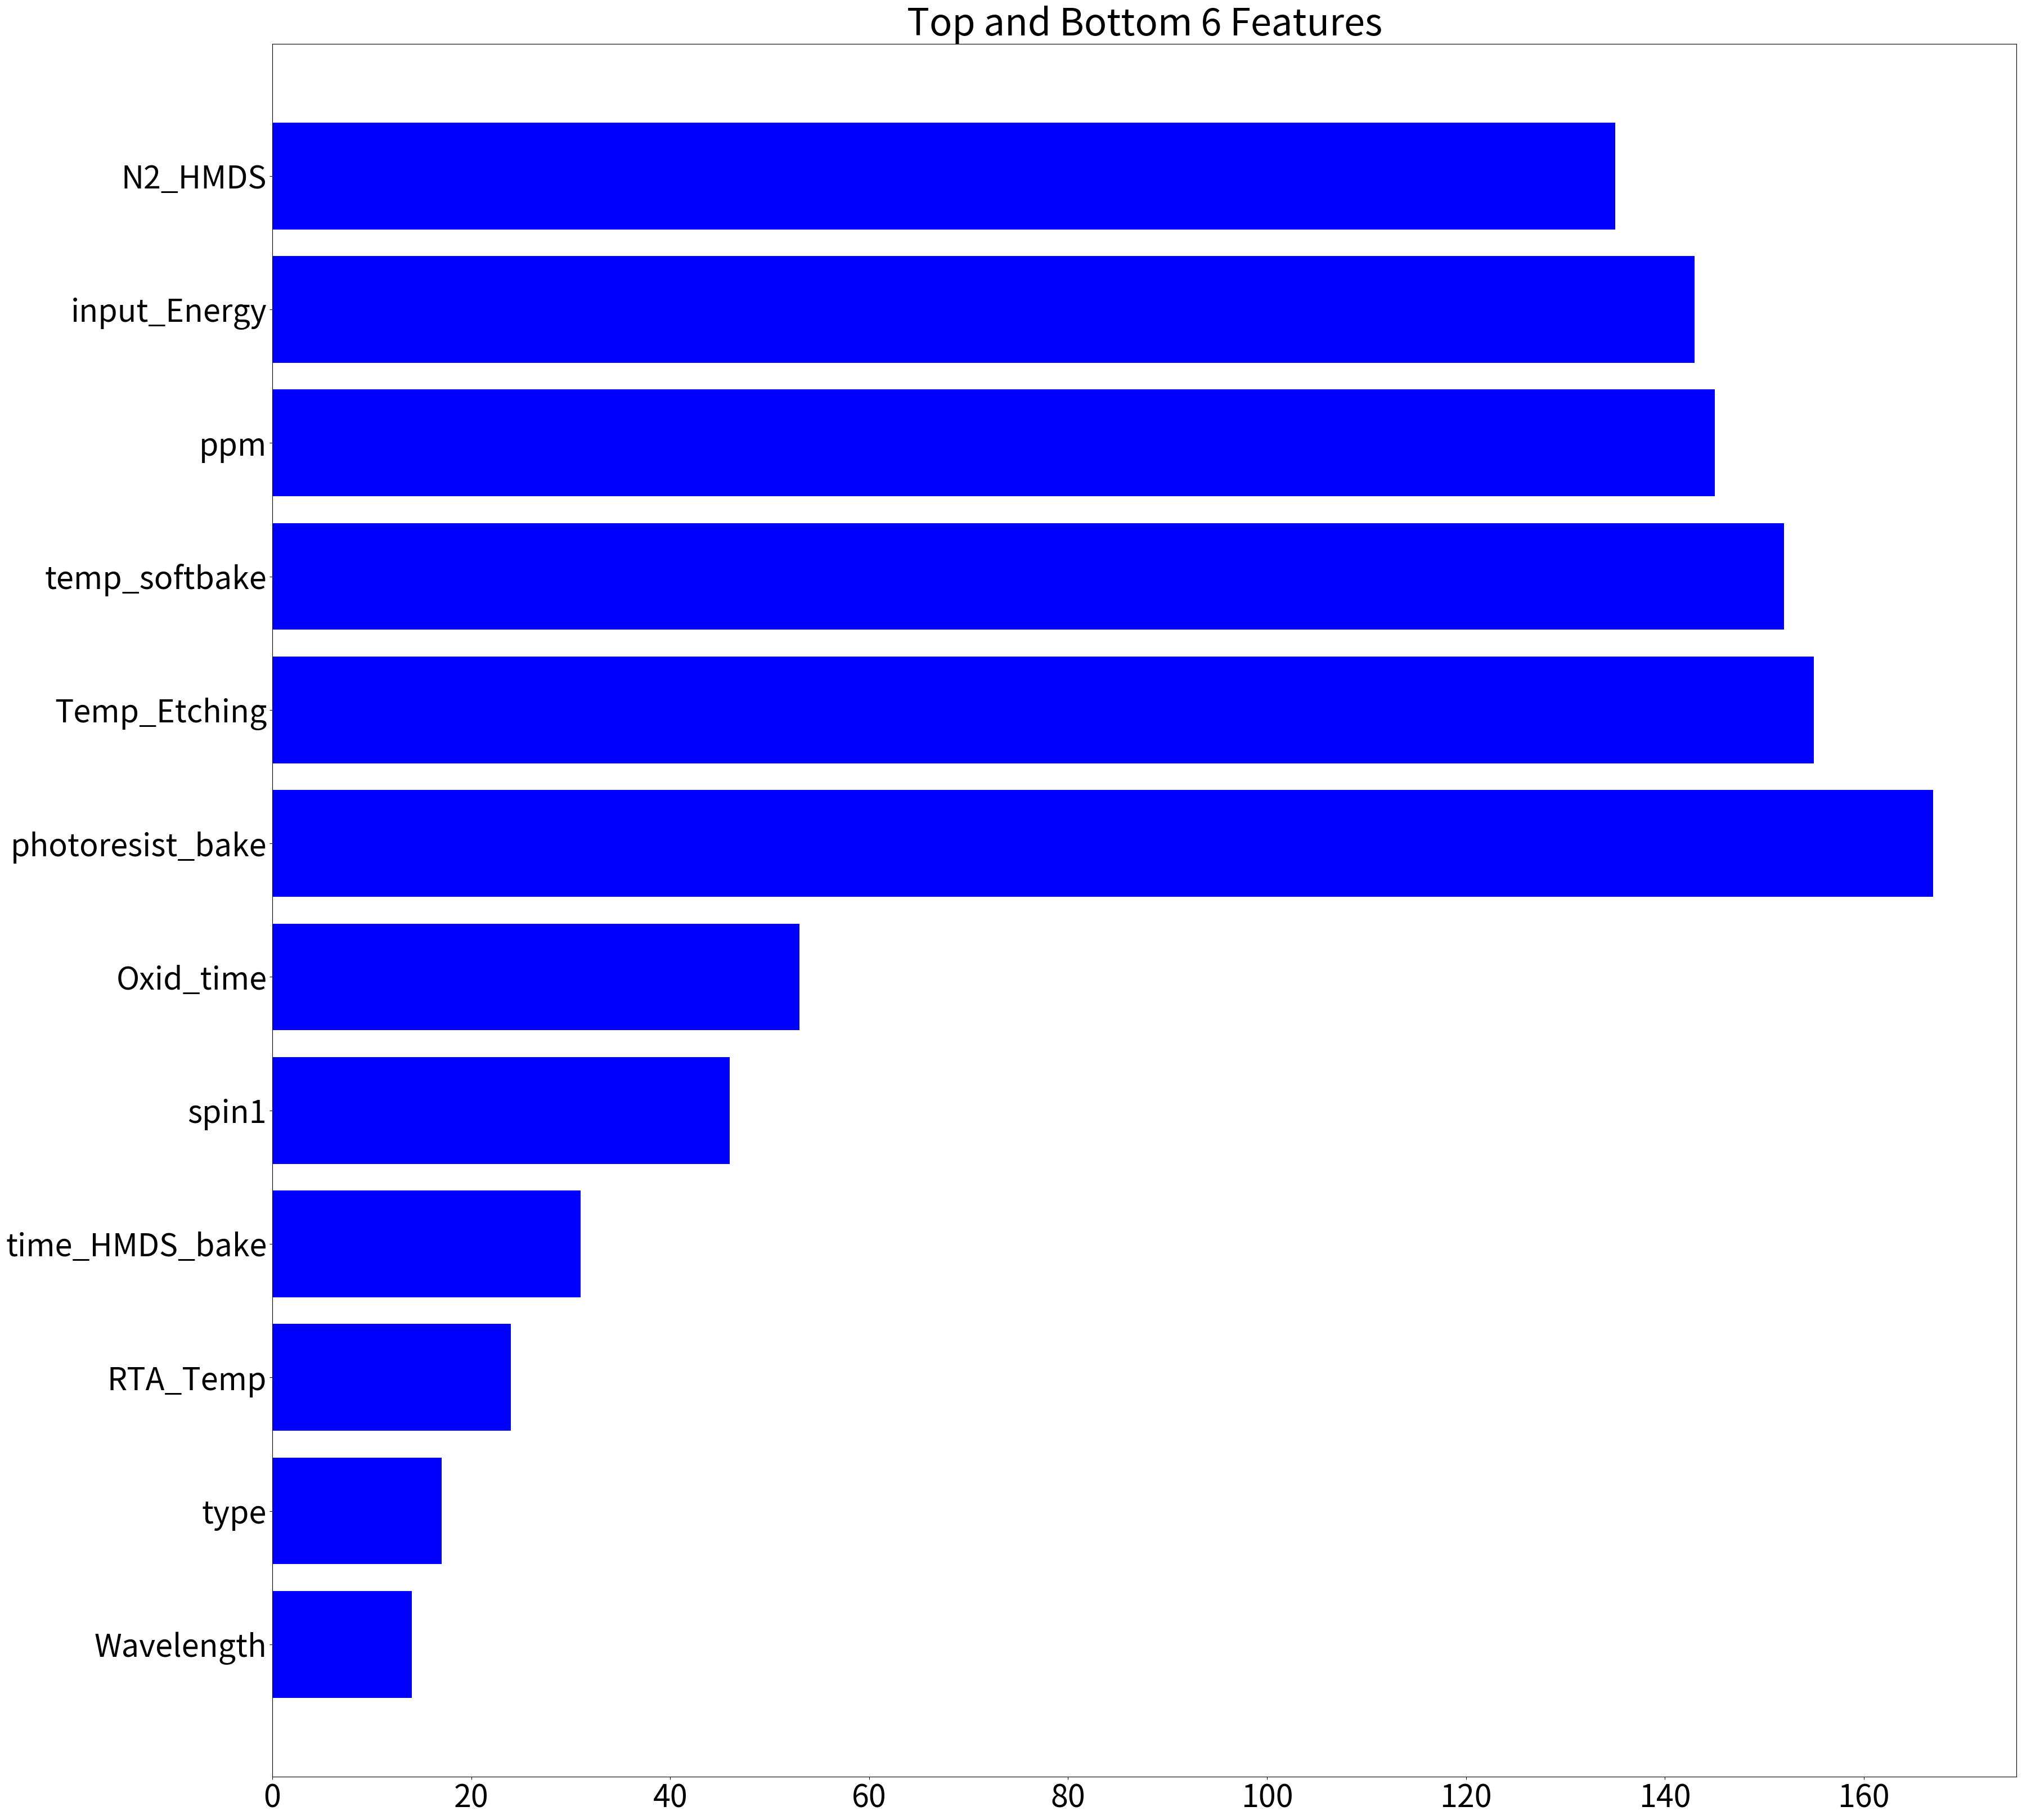

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

print(lgbm_user.feature_name_)
print(lgbm_user.feature_importances_)

# 그래프의 폰트 크기 설정
plt.rcParams['font.size'] = 40

# 특성의 이름과 중요도 추출
feature_importances = lgbm_user.feature_importances_
feature_names = lgbm_user.feature_name_

# 중요도가 큰 순서대로 상위 6개 특성 선택
top_features_indices = feature_importances.argsort()[::-1][:6]  # 내림차순으로 정렬한 후 순서 뒤집기
top_feature_names = [feature_names[idx] for idx in top_features_indices]
top_feature_importances = [feature_importances[idx] for idx in top_features_indices]


# 중요도가 작은 순서대로 하위 6개 특성 선택
bottom_features_indices = feature_importances.argsort()[:6]
bottom_feature_names = [feature_names[idx] for idx in bottom_features_indices]
bottom_feature_importances = [feature_importances[idx] for idx in bottom_features_indices]

# 상위 6개와 하위 6개의 특성을 하나의 리스트로 합치기
all_feature_names = bottom_feature_names + top_feature_names 
all_feature_importances = bottom_feature_importances + top_feature_importances

# 그래프 그리기
fig, ax = plt.subplots(figsize=(40, 40))

# 모든 특성 그래프
ax.barh(range(len(all_feature_names)), all_feature_importances, align='center', color='blue')
ax.set_yticks(range(len(all_feature_names)))
ax.set_yticklabels(all_feature_names)
ax.set_title('Top and Bottom 6 Features')

plt.show()


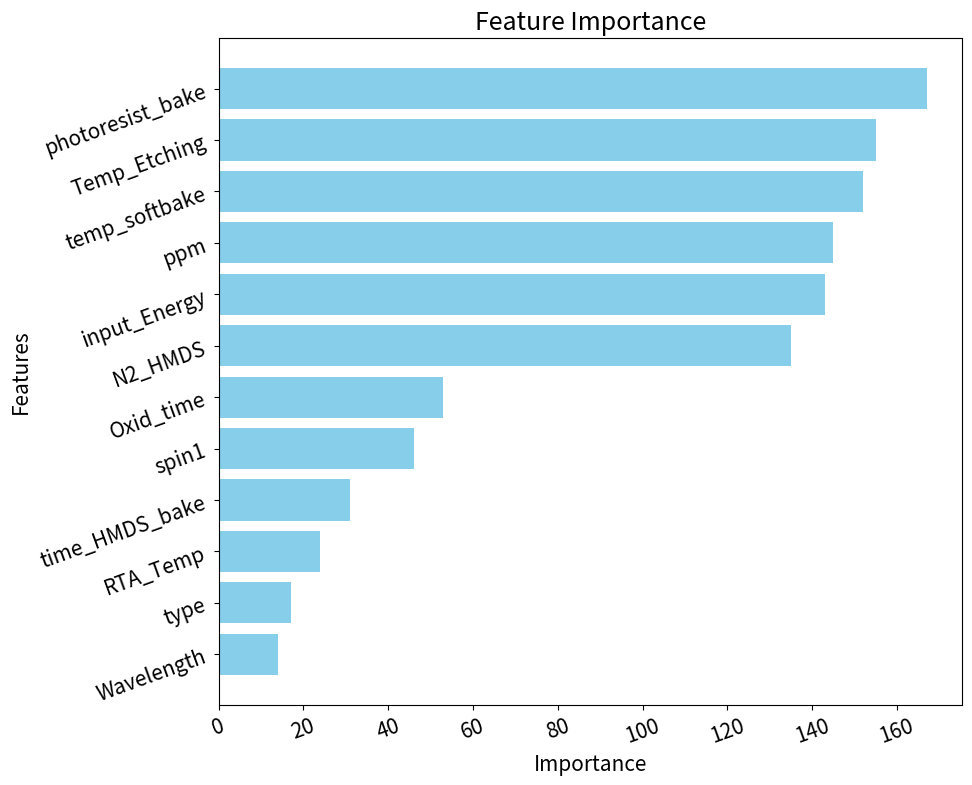

In [ ]:
import matplotlib.pyplot as plt

# 주어진 데이터
features = ['photoresist_bake','Temp_Etching','temp_softbake', 'ppm', 'input_Energy', 'N2_HMDS','Wavelength','type','RTA_Temp','time_HMDS_bake','spin1','Oxid_time']
importance_values = [167,155,152,145,143,135,14,17,24,31,46,53]

# 데이터를 내림차순으로 정렬
sorted_indices = sorted(range(len(importance_values)), key=lambda k: importance_values[k], reverse=True)
sorted_features = [features[i] for i in sorted_indices]
sorted_importance_values = [importance_values[i] for i in sorted_indices]

# 세로막대 그래프 그리기
plt.figure(figsize=(10, 8))
plt.barh(sorted_features, sorted_importance_values, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # y축 순서 뒤집기 (상위가 위로 오도록)
plt.tight_layout()
plt.rcParams['font.size'] = 15
plt.xticks(rotation=20)
plt.yticks(rotation=20)
# 그래프 보여주기
plt.show()
